In [2]:
import pandas as pd 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [24]:
df = pd.read_csv('../data/all_wiki_data.csv')
df.head(5)

,title,content,label
0,Melocalamus scandens,Melocalamus scandens là một loài thực vật có h...,0
1,Paleauletobius silenus,Paleauletobius silenus là một loài bọ cánh cứn...,0
2,Zoodes hirsutus,Zoodes hirsutus là một loài bọ cánh cứng trong...,0
3,Quốc kỳ Argentina,Quốc kỳ Argentina ( tiếng Tây Ban Nha : Bander...,3
4,Dundahera,Dundahera là một thị trấn thống kê ( census to...,1


In [25]:
print(df.head(5).content[0])

Melocalamus scandens là một loài thực vật có hoa trong họ Hòa thảo . Loài này được Hsueh & C.M.Hui mô tả khoa học đầu tiên năm 1992. [1]


In [26]:
def remove_footnotes(text):
    # Using regular expression to find and replace footnote symbols
    cleaned_text = re.sub(r'\[\d+\]', '', text)
    return cleaned_text

In [27]:
df['content'] = df['content'].apply(remove_footnotes)


In [28]:
print(df.head(5).content[1])

Paleauletobius silenus là một loài bọ cánh cứng trong họ Rhynchitidae . Loài này được Heer miêu tả khoa học năm 1847. 


In [29]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Get Vietnamese stopwords
stopwords = set(nltk.corpus.stopwords.words('vietnamese'))

In [31]:
print(stopwords)

{'phỏng như', 'tà tà', 'toẹt', 'gần bên', 'có đâu', 'chung ái', 'gần như', 'trong ấy', 'bấy nay', 'lần sang', 'đều bước', 'văng tê', 'đặt trước', 'vèo vèo', 'nào cũng', 'mỗi một', 'nói ra', 'cần', 'đến gần', 'suýt nữa', 'lên mạnh', 'nói xa', 'quá tuổi', 'ngoài này', 'được tin', 'tin vào', 'thực sự', 'nói nhỏ', 'thế thường', 'xiết bao', 'nặng mình', 'quá bán', 'dùng', 'cật lực', 'còn như', 'thế à', 'dưới nước', 'không cứ', 'bước đi', 'căn', 'làm dần dần', 'nền', 'dài lời', 'hoàn toàn', 'có thế', 'dễ', 'cho được', 'tháng năm', 'lại ăn', 'bất giác', 'bất kể', 'cái đã', 'đạt', 'bạn', 'hết rồi', 'sốt sột', 'thích cứ', 'điểm gặp', 'hiểu', 'cực lực', 'tỏ vẻ', 'thục mạng', 'đây đó', 'ít', 'ít thôi', 'trước kia', 'của tin', 'tính từ', 'vô vàn', 'làm theo', 'chui cha', 'bởi vậy', 'nữa là', 'trong đó', 'đến cùng cực', 'bấy lâu', 'ở trên', 'như ý', 'ắt là', 'rồi xem', 'thì phải', 'vẫn', 'mỗi người', 'trả ngay', 'đủ điểm', 'hết ráo', 'quan trọng', 'dễ gì', 'chung cục', 'phăn phắt', 'làm ngay', 'ơi'

In [34]:
from underthesea import word_tokenize
def remove_stopwords_vietnamese(text):
    tokens = word_tokenize(text)
    stopwords = set(nltk.corpus.stopwords.words('vietnamese'))
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [35]:
# Apply the function to the 'content' column
df['content'] = df['content'].apply(remove_stopwords_vietnamese)

In [38]:
df.content[20]

'Samsung Jet ( gọi là Samsung S8000 ) , điện thoại cảm ứng phát hành 6 2009 Samsung . vi 800 MHz trình duyệt Web gọi là Dolfin , sẵn điện thoại Samsung tương lai .'

In [39]:
import string
def remove_punctuation(text):
    punctuation_chars = string.punctuation.replace("_", "")
    cleaned_text = ''.join([char for char in text if char not in punctuation_chars])
    return cleaned_text

In [40]:
df['content'] = df['content'].apply(remove_punctuation)

In [41]:
df.content[30]

'Trogoderma caboverdiana loài bọ cánh cứng Dermestidae  Loài Kalík miêu tả khoa học 1986 '

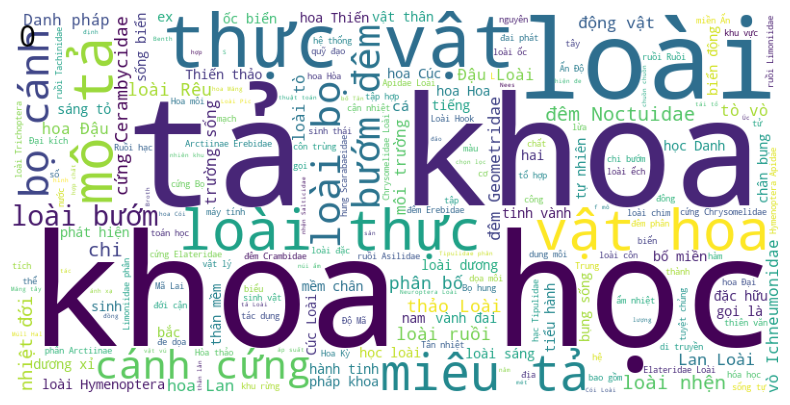

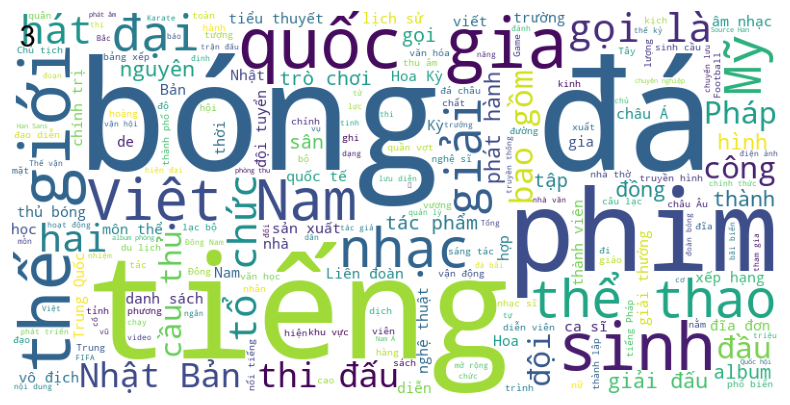

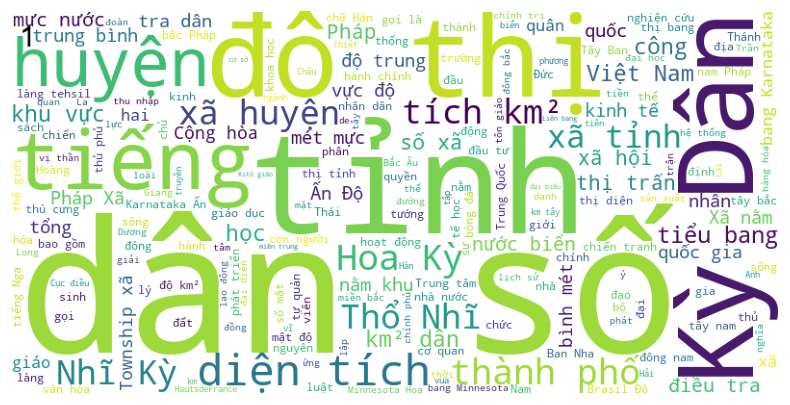

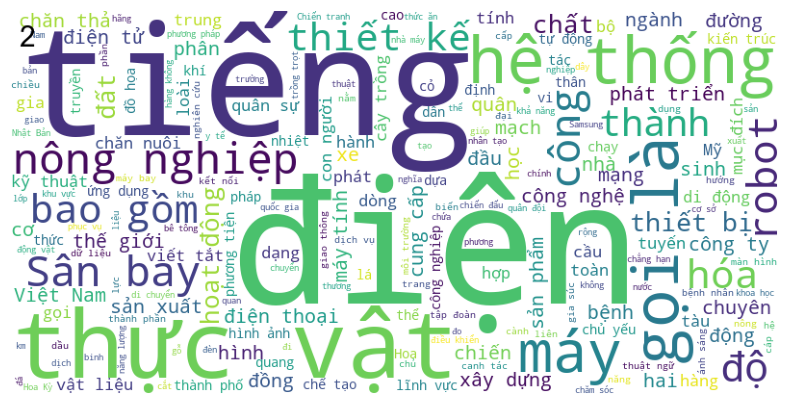

In [45]:
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

def generate_wordcloud_with_label(text, label):
    # Tạo đối tượng WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Chuyển WordCloud thành mảng numpy
    wordcloud_array = wordcloud.to_array()

    # Tạo hình ảnh từ mảng numpy
    img = Image.fromarray(wordcloud_array)

    # Tạo một đối tượng vẽ
    draw = ImageDraw.Draw(img)

    # Thêm nhãn vào ảnh
    font = ImageFont.truetype("arial.ttf", 30)  # Lựa chọn font và kích cỡ chữ
    draw.text((10, 10), label, fill="black", font=font)  # Vẽ văn bản tại vị trí (10, 10)

    # Hiển thị ảnh
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Tạo WordCloud cho từng nhóm và thêm tên nhãn
for label in df['label'].unique():
    label_str = str(label)  # Chuyển đổi label sang chuỗi trước khi sử dụng
    text = ' '.join(df[df['label'] == label]['content'])
    generate_wordcloud_with_label(text, label_str)


In [23]:
from underthesea import word_tokenize
text = "Tôi là sinh viên trường đại học công nghệ, đại học quốc gia Hà Nội."
tokens = word_tokenize(text)
print(tokens)


['Tôi', 'là', 'sinh viên', 'trường', 'đại học', 'công nghệ', ',', 'đại học', 'quốc gia', 'Hà Nội', '.']


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2224 non-null   object
 1   content  2224 non-null   object
 2   label    2224 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.2+ KB


In [53]:
def tokenize(text):
    return word_tokenize(text)

In [54]:
df['content'] = df['content'].apply(tokenize)

In [55]:
df.content[1]

['Paleauletobius',
 'silenus',
 'loài',
 'bọ cánh',
 'cứng',
 'Rhynchitidae Loài',
 'Heer',
 'miêu tả',
 'khoa học',
 '1847']